# **Author :- Suraj Singh**
---



***Task 1 - Detection of the Parkinson's Disease***

**Parkinson’s disease**

Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It has 5 stages to it and affects more than 1 million individuals every year in India. This is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain.


**Steps for Detecting Parkinson’s Disease**

---



In [7]:
#DataFlair - Maake necessary imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib
from sklearn.preprocessing import StandardScaler #scaling/'
from sklearn.model_selection import train_test_split #dividing data set
from sklearn.decomposition import PCA #dimensionality reduction
from sklearn.linear_model import LogisticRegression #LogisticRegression
from sklearn.metrics import accuracy_score #Accuray Score

***Table of Content***
- Reading csv file
- EDA
- Simplify the data
- Scaling
- Train Test Split
- PCA
- LogisticRegression


**Reading csv file**

*Let’s read the data into a DataFrame and get the first 5 records*

In [8]:
#DataFlair - Read the data
df=pd.read_csv('./pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [9]:
df.shape

(756, 755)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [11]:
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [12]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


***Exploratory data analysis (EDA)***

Is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

<Axes: xlabel='gender', ylabel='count'>

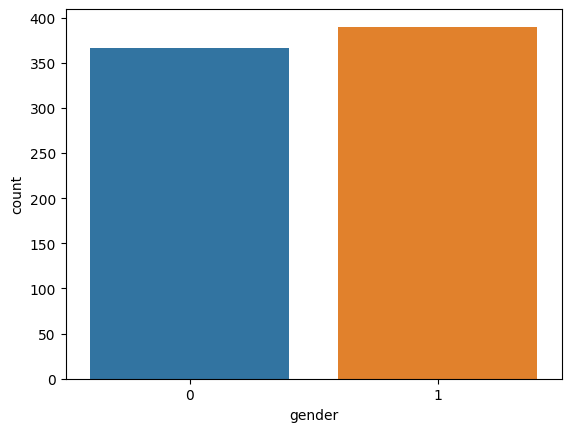

In [13]:
sns.countplot(x=df['gender'])

<Axes: xlabel='class', ylabel='count'>

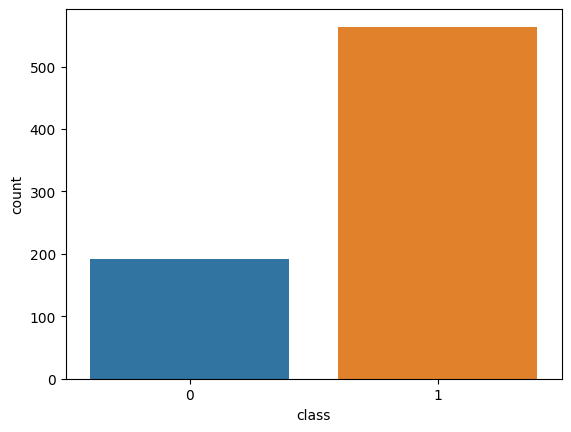

In [14]:
sns.countplot(x=df['class'])

<Axes: xlabel='numPulses', ylabel='count'>

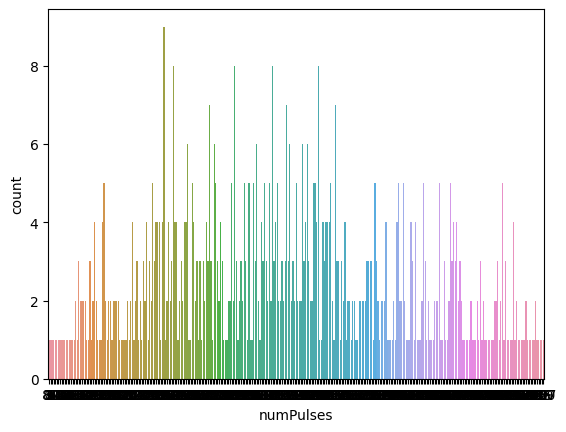

In [15]:
sns.countplot(x=df['numPulses'])

<Axes: xlabel='tqwt_kurtosisValue_dec_35', ylabel='Count'>

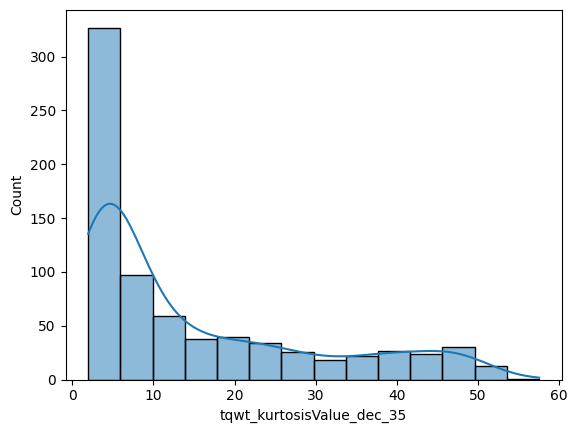

In [16]:
sns.histplot(df['tqwt_kurtosisValue_dec_35'],kde=True)

<Axes: xlabel='numPulses', ylabel='Density'>

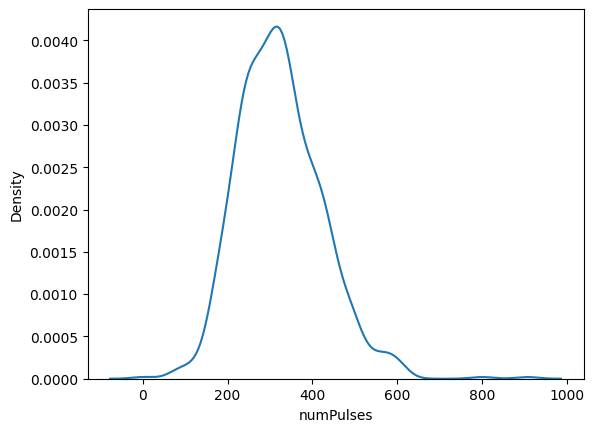

In [17]:
sns.kdeplot(df['numPulses'])

**Simplify the data**

In [18]:
x = df.iloc[:, 0:6].values
y = df.iloc[:, -1].values 

In [19]:
x

array([[  0.     ,   1.     ,   0.85247,   0.71826,   0.57227, 240.     ],
       [  0.     ,   1.     ,   0.76686,   0.69481,   0.53966, 234.     ],
       [  0.     ,   1.     ,   0.85083,   0.67604,   0.58982, 232.     ],
       ...,
       [251.     ,   0.     ,   0.88389,   0.72335,   0.46815, 381.     ],
       [251.     ,   0.     ,   0.83782,   0.7489 ,   0.49823, 340.     ],
       [251.     ,   0.     ,   0.81304,   0.76471,   0.46374, 340.     ]])

In [20]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**Scaling**

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [21]:
x= StandardScaler().fit_transform(x)

**Train Test Split**

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [24]:
x_train.shape

(680, 6)

In [25]:
x_test.shape

(76, 6)

**Principal component analysis[PCA]**

PCA is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [26]:
pca = PCA(n_components = 6)
x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [27]:
x_train_new.shape
x_train_new

array([[ 0.10846932, -0.4321205 ,  1.34417968, -0.55116551,  0.41974963,
         0.38570943],
       [-1.8204844 , -0.79854269,  0.4912104 ,  0.66113853, -0.24198651,
        -0.03986866],
       [-1.34583166, -1.0940462 ,  0.19710601,  1.02702899, -0.28898227,
         0.42547438],
       ...,
       [-1.65628508,  1.24385013, -1.49058855, -0.58444705, -0.85499645,
        -0.99639121],
       [ 0.70933161, -1.05314261,  0.17641992, -0.88961059,  0.62085744,
        -0.00927023],
       [ 0.62373054,  0.1137832 , -0.81885462,  1.4157557 , -0.52372338,
         0.09905593]])

In [28]:
x_test_new.shape

(76, 6)

**Logistic Regression**

Logistic regression is a data analysis technique that uses mathematics to find the relationships between two data factors. It then uses this relationship to predict the value of one of those factors based on the other.

**LogisticRegression before PCA**

In [29]:
classifier = LogisticRegression(random_state=42)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=42)

**LogisticRegression after PCA**

In [30]:
classifier2 = LogisticRegression(random_state=42)
classifier2.fit(x_train_new,y_train)

LogisticRegression(random_state=42)

In [54]:
y_pred = classifier.predict(x_test) 
y_pred_new = classifier2.predict(x_test_new) 
y_pred_new

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

**Accuray Score:**

In [32]:
accuracy_score(y_test, y_pred)*100

76.31578947368422

In [33]:
accuracy_score(y_test, y_pred_new)*100

76.31578947368422

In [68]:
#if running for first time run the pip file
#!pip install gradio
import gradio as gr
import warnings
warnings.filterwarnings('ignore')

In [76]:
def prediction(Person):
  
  if y_pred_new[int(Person)]==0:
    return "The Person Will not be affected by Parkinsons's Disease"
  return "The person might be affected by Parkinsons's Disease with probability of  "

In [86]:

interface = gr.Interface(fn = prediction,inputs=gr.inputs.Textbox(lines = 5,placeholder="You Can Select Person's Postion from 0 to 75",label="Person's Postion"),outputs='text',theme='freddyaboulton/dracula_revamped')

In [87]:
interface.launch(inbrowser=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

# ***Thank You***

---

